In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy import Symbol, diff, lambdify
from mpl_toolkits import mplot3d
from IPython import display
from mystery_func import *
from sklearn.linear_model import LinearRegression

In [2]:
%load_ext autoreload
%autoreload 2

# Minimizing a Mystery Function

In [3]:
mystery_func, _ = get_mystery_function()

We want to minimize our mystery function, but we can't graph it. So how do we do this?

## Let's try some random values

In [4]:
our_minimum, our_guesses = try_guesses(mystery_func)

Enter a guess: 1
1.036203e+07
Enter a guess: .05
1.033755e+07
Enter a guess: -1000
5.802580e+05
Enter a guess: -1000000
1.597425e+13
Enter a guess: -10000
1.352776e+09
Enter a guess: -5000
2.815563e+08
Enter a guess: -2000
2.282426e+07
Enter a guess: -1200
2.469058e+06
Enter a guess: -500
1.458258e+06
Enter a guess: -800
-2.854200e+04


# Let's see how we did:

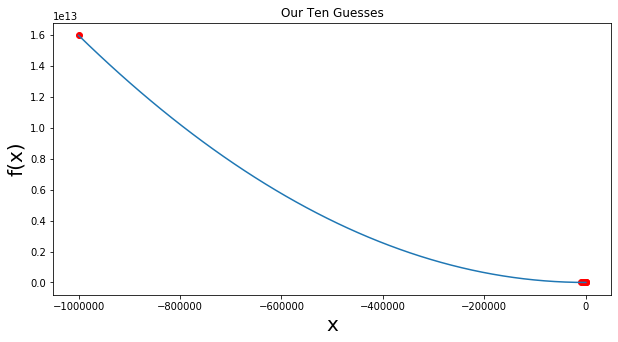

In [6]:
plot_guesses(our_guesses, mystery_func, title="Our Ten Guesses"); 

In [7]:
our_minimum

-28542.0

Okay, let's see what the actual minimum of this function is:

In [8]:
actual_min, x_min = get_actual_minimum(mystery_func)

Minimum of -28922.25 at x = -804.88


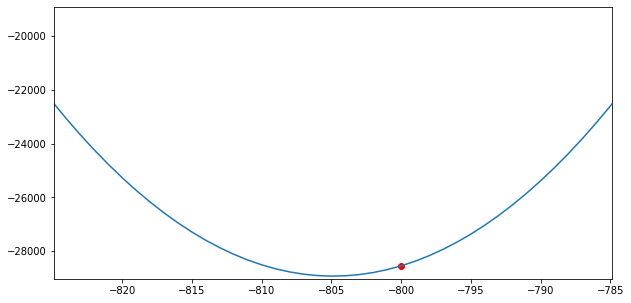

In [9]:
plot_near_min(our_guesses, mystery_func, actual_min, x_min, x_range = 20);

Okay, great, maybe we can have our computer check a bunch of values to find the minimum.



## Let's have the computer try random values

In [11]:
def random_search(mystery_func, n_guesses, lower_bound = -1e6, upper_bound = 1e6):
    guesses = []
    best_guess = None
    for _ in range(n_guesses):
        current_guess = np.random.randint(lower_bound, upper_bound)
        guesses.append(current_guess)
        current_result = mystery_func(current_guess)
        if not best_guess or current_result < best_result:
            best_guess, best_result = current_guess, current_result
    
    print(f"Our minimum was {best_result} from our guess x = {best_guess}")
    return guesses

In [12]:
computer_guesses = random_search(mystery_func, 10000)

Our minimum was -23810 from our guess x = -787


In [13]:
get_actual_minimum(mystery_func);

Minimum of -28922.25 at x = -804.88


## Let's plot the computer's guesses

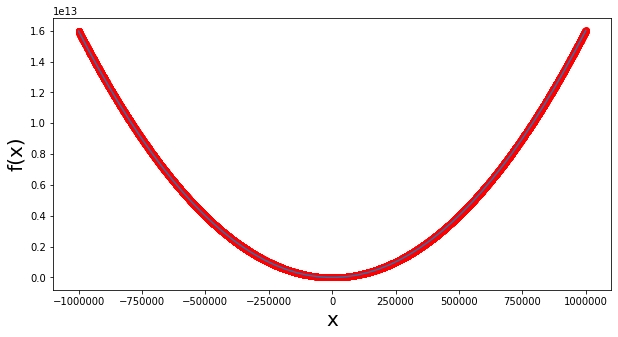

In [15]:
plot_guesses(computer_guesses, mystery_func);

Wow, it looks like it traced the whole function, but let's zoom into where the minimum is again

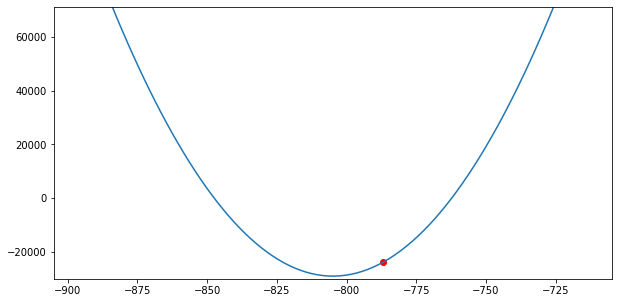

In [17]:
plot_near_min(computer_guesses, mystery_func, actual_min, x_min, x_range = 100, y_range = 100000);

Okay, this isn't bad for a naive brute force approach, but these approaches only work as well as they do because these are simple parabola shaped functions. How might we minimize a function that's more complicated and/or of higher-dimensionality?

For that, we can use our secret weapon, calculus! We can use calculus to get the derivative of our function.

How can the derivative help us?
The derivative gives us the current rate of change of f(x) given a small increase in x, which we call dx.

That's the more mathematical definition, but perhaps a more intuitive way to think of it is as the current slope of the function.

![](derivative_graph.png)

### Let's try a new mystery function and use the derivative to guide our guesses

In [18]:
mystery_func, mystery_func_prime = get_mystery_function()

In [20]:
our_minimum, our_guesses = try_guesses(mystery_func, deriv=mystery_func_prime)

Enter a guess: 0
Current value: 1.41e+07, current derivative: -3.00e+04
Enter a guess: 1
Current value: 1.40e+07, current derivative: -3.00e+04
Enter a guess: 466.67
Current value: 3.55e+06, current derivative: -1.51e+04
Enter a guess: 800
Current value: 3.11e+05, current derivative: -4.39e+03
Enter a guess: 1600
Current value: 7.04e+06, current derivative: 2.12e+04
Enter a guess: 950
Current value: 1.20e+04, current derivative: 4.10e+02
Enter a guess: 900
Current value: 3.15e+04, current derivative: -1.19e+03
Enter a guess: 925
Current value: 1.18e+04, current derivative: -3.90e+02
Enter a guess: 930
Current value: 1.02e+04, current derivative: -2.30e+02
Enter a guess: 937
Current value: 9.39e+03, current derivative: -6.00e+00


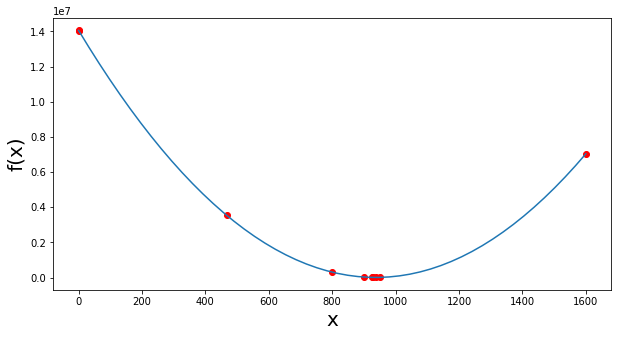

In [22]:
plot_guesses(our_guesses, mystery_func);

In [23]:
our_minimum

9386.0

In [24]:
get_actual_minimum(mystery_func);

Minimum of 9385.44 at x = 937.19


This is really getting us somewhere!

So now can we functionalize this process?

In [25]:
def find_minimum(initial_guess, n_iterations, step_size):
    current_location = initial_guess
    for _ in range(n_iterations):
        current_val = mystery_func(current_location)
        current_slope = mystery_func_prime(current_location)
        if current_slope < 0:
            current_location += step_size
        elif current_slope > 0:
            current_location -= step_size
        else:
            break
    print(f"Minimum value: {current_val} at x = {current_location}")
    return current_val, current_location

What issues do you foresee with this method?

How will the parameters affect our results?

Let's try some different values out:

In [ ]:
initial_guess = np.random.randint(-5000, 5000)
find_minimum(initial_guess, 1000, 5);

In [31]:
get_actual_minimum(mystery_func);

Minimum of 9385.44 at x = 937.19


This is getting really good, but we're still limited in precision by the step size and range by the number of iterations times the step size. How can we take large enough steps that we get close to the minimum and then smaller steps as we get closer?

Maybe we can use the magnitude of the derivative to decide how big of a step to take?

In [32]:
def gradient_descent(loss_function, derivative, initial_guess=0, n_iterations=1000, alpha = 0.001):
    current_location = initial_guess
    guesses = [initial_guess]
    for _ in range(n_iterations):
        current_val = loss_function(current_location)
        current_slope = derivative(current_location)
        current_location += alpha * -current_slope
        guesses.append(current_location)
        
    print(f"Minimum: {current_val:.2f} at x = {current_location:.2f}")
    return current_location, np.array(guesses)

In [33]:
x_min, guesses = gradient_descent(mystery_func, mystery_func_prime)

Minimum: 9385.44 at x = 937.19


In [34]:
get_actual_minimum(mystery_func);

Minimum of 9385.44 at x = 937.19


## We did it! Our gradient descent found the actual minimum of the function!

Any potential problems we might run into with this algorithm? Any ways we could improve it?

We could certainly make it more efficient, it had already gotten to the answer many iterations before it stopped.

In [37]:
guesses[-10:]

array([937.1875, 937.1875, 937.1875, 937.1875, 937.1875, 937.1875,
       937.1875, 937.1875, 937.1875, 937.1875])

Here we will demonstrate one more issue that you don't need to be too worried about, but is good to be aware of:

In [38]:
higher_order_func, higher_order_func_prime = get_higher_order_mystery_function()

In [39]:
_, guesses1 = gradient_descent(higher_order_func, higher_order_func_prime);

Minimum: 32.38 at x = 1.17


In [40]:
_, guesses2 = gradient_descent(higher_order_func, higher_order_func_prime, initial_guess = -10);

Minimum: 16.83 at x = -3.80


What happened? Why did the initial guess change our answer so much? Let's plot our paths for each run of gradient descent:

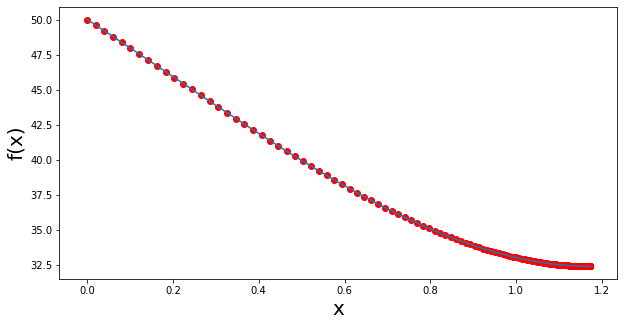

In [41]:
plot_guesses(guesses1, higher_order_func);

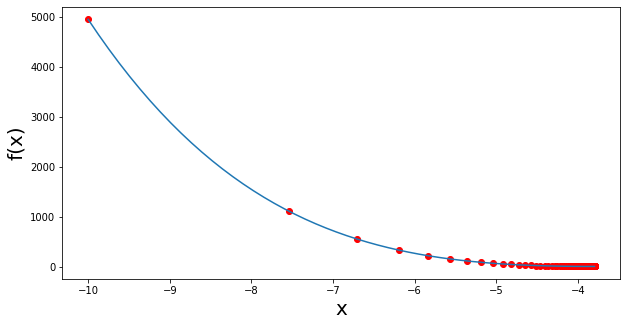

In [42]:
plot_guesses(guesses2, higher_order_func);

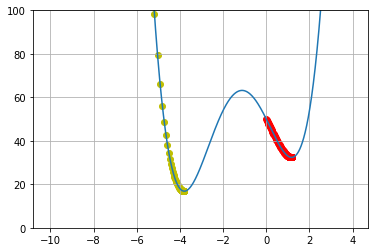

In [43]:
fig, ax = plt.subplots()
ax.plot(np.linspace(-6, 4, 100000), higher_order_func(np.linspace(-6, 4, 100000)))
ax.set_ylim(0, 100)
ax.scatter(guesses1, higher_order_func(guesses1), color = 'r')
ax.scatter(guesses2, higher_order_func(guesses2), color = 'y')
ax.grid()

Okay so now you may remember from calculus that we can actually set the derivative to 0 and solve to find the location of minima of a function. And we could certainly do that for these functions, so why is gradient descent useful? Because we will be trying to descend multivariable equations where we can't explicitly solve for the derivative.

This is where gradient descent really shines, when we have to use partial derivatives on a multivariable equation.

Quick Review: what is a partial derivative?

A partial derivative is less intimidating than it sounds

Let's say we have a function f(x, y) = 5x^2 - 6y

We want to do the same thing we've been doing, minimize the function and hopefully use its derivative to help us do that.

But how do we take the derivative of a function with multiple variables. We take the partial derivative with respect to each variable in the equation.

So first we take the partial derivative with respect to x, treating y as a constant, and then the partial derivative with respect to y, treating x as a constant.

So when we take the partial derivative with respect to x, we treat y as a constant and we get:
df/dx = 10x

then for y we get:
df/dy = -6

Now rather than getting a single value when we evaluate the derivative of our function we get a vector
[10x, -6]

We call this vector the gradient, hence the name gradient descent.

Let's take a look at an example multivariable equation to get an idea of what we'll be doing

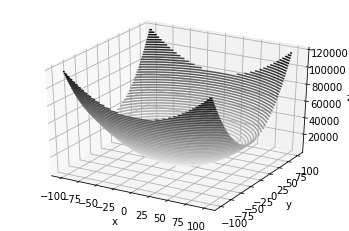

In [8]:
def f(x, y):
    return 4*x**2 + 8* y**2

x = np.linspace(-100, 100, 100)
y = np.linspace(-100, 100, 100)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

In [9]:
x = Symbol('x')
y = Symbol('y')
multi_var_func = 4*x**2 + 8* y**2
multi_var_func

4*x**2 + 8*y**2

Okay, so here is a simple example, can anyone tell me the partial derivatives of this function?

In [10]:
multi_var_func.diff(x)

8*x

In [11]:
multi_var_func.diff(y)

16*y

## Application

Okay this is all good and well, but what does this have to do with machine learning?

We can use gradient descent to minimize a loss function.

What is a loss function? A loss function is what we use to evaluate how well our model is fitting our data.

Let's work through an example, let's come up with our loss function for this simple linear regression problem.

We will be doing linear regression on some fish market data.

We will use two variables, the Height and Width of the fish to predict its Weight.

In [49]:
df = pd.read_csv('data/Fish.csv', nrows=5)

In [50]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430,26.5,29.0,34.0,12.4440,5.1340


In [51]:
df[['Height', 'Width', 'Weight']]

,Height,Width,Weight
0,11.5200,4.0200,242
1,12.4800,4.3056,290
2,12.3778,4.6961,340
3,12.7300,4.4555,363
4,12.4440,5.1340,430


So we want to figure out the best coefficients for an equation Weight = B_0 + B_1 * Height + B_2 * Width

We can think of the Weight in that equation as Actual Weight and the right side of the equation is our Predicted Weight

Therefore a reasonable loss function might be the sum of squared differences between Actual Weight and Predicted Weight for all of our data points.

Now that we have a loss function, we can minimize it using gradient descent.

For simplicity's sake and because it's reasonable to assume a fish with 0 height and 0 width will have 0 weight, we can ignore the constant.

Thus our loss function becomes (Actual Weight - (B_1 * Height + B_2 * Width))**2 for each data point

In [53]:
B_1 = Symbol('B_1')
B_2 = Symbol('B_2')
loss_func_sym = (242 - (B_1 * 11.52 + B_2 * 4.02))**2 \
            + (290 - (B_1 * 12.48 + B_2 * 4.31))**2 \
            + (340 - (B_1 * 12.38 + B_2 * 4.7))**2 \
            + (363 - (B_1 * 12.73 + B_2 * 4.46))**2 \
            + (430 - (B_1 * 12.44 + B_2 * 5.13))**2

## Our messy loss function:

In [54]:
loss_func_sym

58564*(-0.047603305785124*B_1 - 0.0166115702479339*B_2 + 1)**2 + 84100*(-0.0430344827586207*B_1 - 0.0148620689655172*B_2 + 1)**2 + 115600*(-0.0364117647058824*B_1 - 0.0138235294117647*B_2 + 1)**2 + 131769*(-0.035068870523416*B_1 - 0.0122865013774105*B_2 + 1)**2 + 184900*(-0.0289302325581395*B_1 - 0.0119302325581395*B_2 + 1)**2

## Partial derivative with respect to B_1:

In [55]:
loss_func_sym.diff(B_1)

1517.0634*B_1 + 557.7564*B_2 - 41172.86

## Partial derivative with respect to B_2:

In [56]:
loss_func_sym.diff(B_2)

557.7564*B_1 + 206.07*B_2 - 15291.24

In [57]:
loss_func = lambdify((B_1, B_2), loss_func_sym)
loss_func_B_1_prime = lambdify((B_1, B_2), loss_func_sym.diff(B_1))
loss_func_B_2_prime = lambdify((B_1, B_2), loss_func_sym.diff(B_2))

Okay so let's try our guesses again!

In [58]:
our_guesses, our_losses = multi_var_guesses(loss_func, loss_func_B_1_prime, loss_func_B_2_prime)

Enter a number:10
Enter another number:50
Loss is 1.10e+04
Negative Gradient is: [-1885.5939999999973, -589.8240000000005]
Enter a number:0
Enter another number:40
Loss is 1.28e+05
Negative Gradient is: [18862.604, 7048.4400000000005]
Enter a number:5
Enter another number:20
Loss is 1.79e+05
Negative Gradient is: [22432.415, 8381.058]
Enter a number:30
Enter another number:60
Loss is 4.80e+05
Negative Gradient is: [-37804.42599999999, -13805.652]
Enter a number:8
Enter another number:45
Loss is 1.54e+04
Negative Gradient is: [3937.3148, 1556.0388000000003]
Enter a number:8.2
Enter another number:45.3
Loss is 1.42e+04
Negative Gradient is: [3466.5752000000066, 1382.6665200000007]
Enter a number:9
Enter another number:46
Loss is 1.14e+04
Negative Gradient is: [1862.4950000000026, 792.2124000000003]
Enter a number:9.5
Enter another number:46.8
Loss is 1.03e+04
Negative Gradient is: [657.7581800000044, 348.47819999999956]
Enter a number:9.7
Enter another number:47
Loss is 1.01e+04
Negative

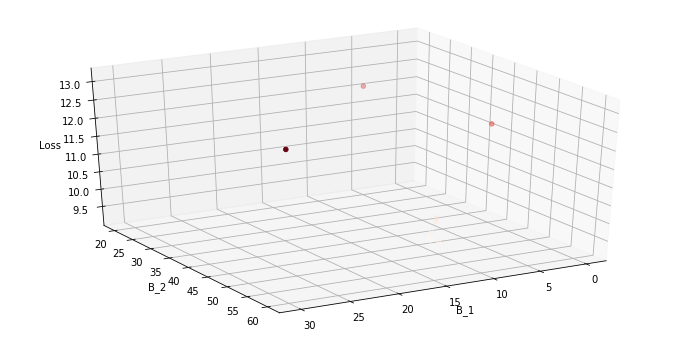

In [59]:
plot_3D_gradient_descent(our_losses, np.array(our_guesses));

In [60]:
def two_var_gradient_descent(loss_function, deriv1, deriv2, initial_guess = np.array([0, 0]), num_iterations = 10000, alpha = 0.001):
    current_location = initial_guess
    derivatives = [deriv1, deriv2]
    guesses = []
    losses = []
    for _ in range(num_iterations):
        current_val = loss_function(current_location[0], current_location[1])
        gradient = np.array([derivative(current_location[0], current_location[1]) for derivative in derivatives])
        current_location = current_location + alpha * -gradient
        guesses.append(current_location)
        losses.append(current_val)
    return current_location, np.array(guesses), np.array(losses)

In [61]:
coefs, guesses, losses = two_var_gradient_descent(loss_func, loss_func_B_1_prime, loss_func_B_2_prime)

In [62]:
coefs, loss_func(coefs[0], coefs[1])

(array([-28.96203075, 152.59368312]), 4483.05621661424)

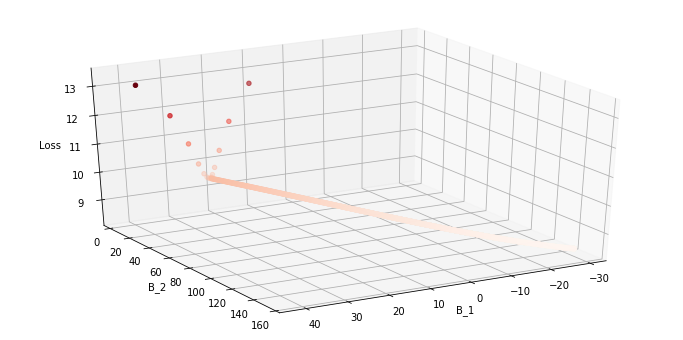

In [63]:
plot_3D_gradient_descent(losses, guesses);

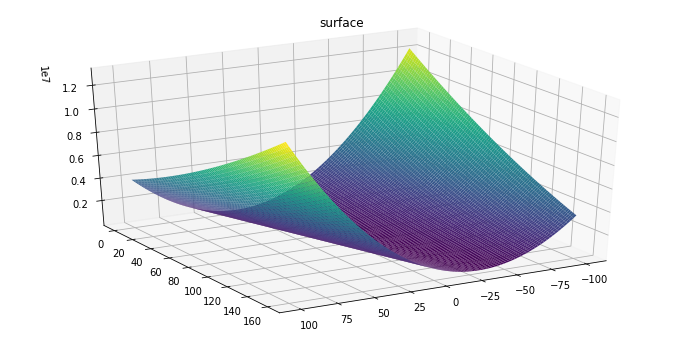

In [64]:
plot_3D_loss(loss_func);

## Confirm our results against Sklearn Linear Regression:

In [66]:
reg = LinearRegression(fit_intercept = False)

In [67]:
X = df[['Height', 'Width']]
y = df['Weight']

In [68]:
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [69]:
reg.coef_

array([-28.46596288, 151.30701746])

In [70]:
loss_func(reg.coef_[0], reg.coef_[1])

4484.318462301013

In [71]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430,26.5,29.0,34.0,12.4440,5.1340


In [72]:
df['Weight'],( df['Height']*reg.coef_[0] + df['Width'] * reg.coef_[1])

(0    242
 1    290
 2    340
 3    363
 4    430
 Name: Weight, dtype: int64,
 0    280.326318
 1    296.212278
 2    358.206889
 3    311.776709
 4    422.579786
 dtype: float64)

In [73]:
df['Weight'],( df['Height']*coefs[0] + df['Width'] * coefs[1])

(0    242
 1    290
 2    340
 3    363
 4    430
 Name: Weight, dtype: int64,
 0    279.784012
 1    295.561218
 2    358.108971
 3    311.194504
 4    423.012459
 dtype: float64)